In [2]:
# Import necessary libraries

# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from scipy import signal

warnings.filterwarnings("ignore")


In [3]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframed
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [4]:
# Check if there are any missing or Null values
missingvalues = df.isnull().sum(axis=1)
print(missingvalues)

0       0
1       0
2       0
3       0
4       0
       ..
996     2
997     0
998     0
999     1
1000    0
Length: 1001, dtype: int64


In [5]:
numrows_missingvalues = (missingvalues > 0).sum()
print(numrows_missingvalues)

37


In [6]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = numrows_missingvalues
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [7]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
df_drop = df.drop('Urgency', axis=1)
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_drop)

In [8]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
df_imputed = pd.DataFrame(df_imputed, columns=df_drop.columns)
df_imputed['Urgency']= df['Urgency']
df = df_imputed
df

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


## EDA

In [9]:
# Splitting the ages into bins or intervals 
age = df['age']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(df)
df.head()

       age  sex  cough  fever  chills  sore_throat  headache  fatigue  \
0     30.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
1     47.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
2     49.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
3     50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0   
4     59.0  0.0    0.0    1.0     0.0          0.0       0.0      0.0   
...    ...  ...    ...    ...     ...          ...       ...      ...   
996   72.0  1.0    0.0    0.4     0.0          0.0       0.0      0.0   
997   56.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
998   43.0  1.0    0.0    1.0     0.0          0.0       0.0      0.0   
999   39.0  1.0    0.0    1.0     0.0          0.0       0.0      0.0   
1000  50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0   

      Urgency Age_Group  
0           0     31-40  
1           0     41-50  
2           0     41-50  
3           0     5

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31-40
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51-60
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,51-60


In [10]:
# Count the number of individuals needing hospital beds urgently in each age group
urgency_counts = df.groupby('Age_Group')['Urgency'].sum()

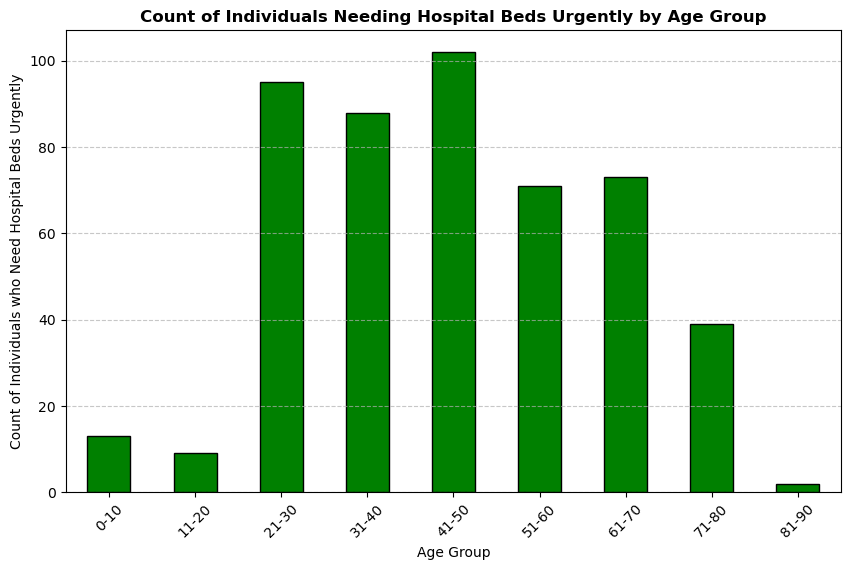

In [11]:
# Plot an appropriate graph to answer the following question
# Your code here
plt.figure(figsize=(10, 6))
urgency_counts.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Individuals who Need Hospital Beds Urgently', fontsize=10)
plt.title('Count of Individuals Needing Hospital Beds Urgently by Age Group', fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

### ⏸ Which age group has the most urgent need for a hospital bed?


#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [12]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


In [13]:
# Drop rows where Urgency is equal to 0 (not urgent)
df_symptoms = df[df['Urgency'] !=0]
df_symptoms

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
6,38.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,31-40
7,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
10,42.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
12,65.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1,61-70
13,44.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,41-50
...,...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1,71-80
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,51-60
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,31-40


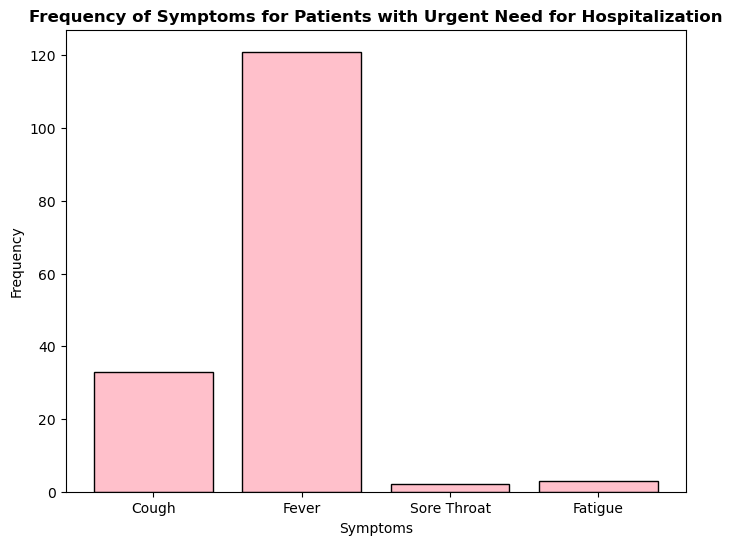

In [14]:
# Plot an appropriate graph to answer the following question    

# Your code here
urgent_patients = df_symptoms[df_symptoms['Urgency'] == 1]

frequency_cough = urgent_patients['cough'].sum()
frequency_fever = urgent_patients['fever'].sum()
frequency_sorethroat = urgent_patients['sore_throat'].sum()
frequency_fatigue = urgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

plt.figure(figsize=(8, 6))
plt.bar(symptoms, frequencies, color='pink', edgecolor='black')
plt.xlabel('Symptoms', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency of Symptoms for Patients with Urgent Need for Hospitalization', fontsize=12, weight='bold')

plt.show();

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [15]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


In [16]:
# Dropping the rows where the patients are 'Urgent' in preparation for plotting
df_nonsymptoms = df[df['Urgency'] !=1]
df_nonsymptoms

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31-40
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51-60
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...
667,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
668,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
669,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21-30
670,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21-30


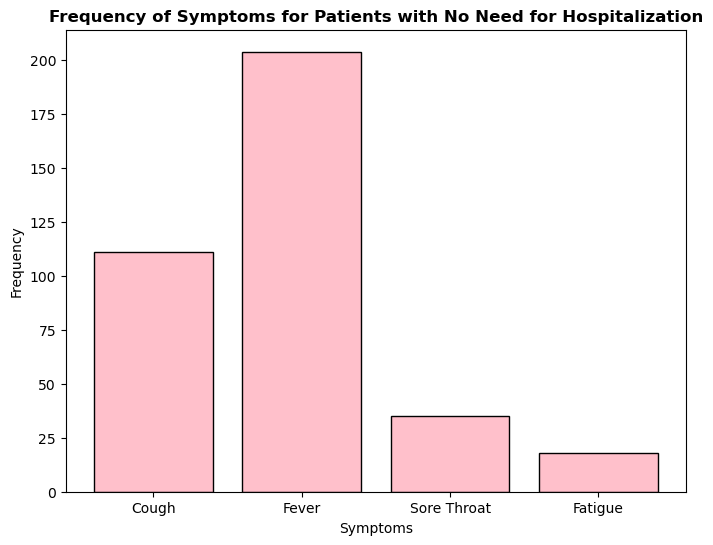

In [17]:
# Plot an appropriate graph to answer the following question    
# Your code here
nonurgent_patients = df_nonsymptoms[df_nonsymptoms['Urgency'] == 0]

frequency_cough = nonurgent_patients['cough'].sum()
frequency_fever = nonurgent_patients['fever'].sum()
frequency_sorethroat = nonurgent_patients['sore_throat'].sum()
frequency_fatigue = nonurgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

plt.figure(figsize=(8, 6))
plt.bar(symptoms, frequencies, color='pink', edgecolor='black')
plt.xlabel('Symptoms', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency of Symptoms for Patients with No Need for Hospitalization', fontsize=12, weight='bold')

plt.show();

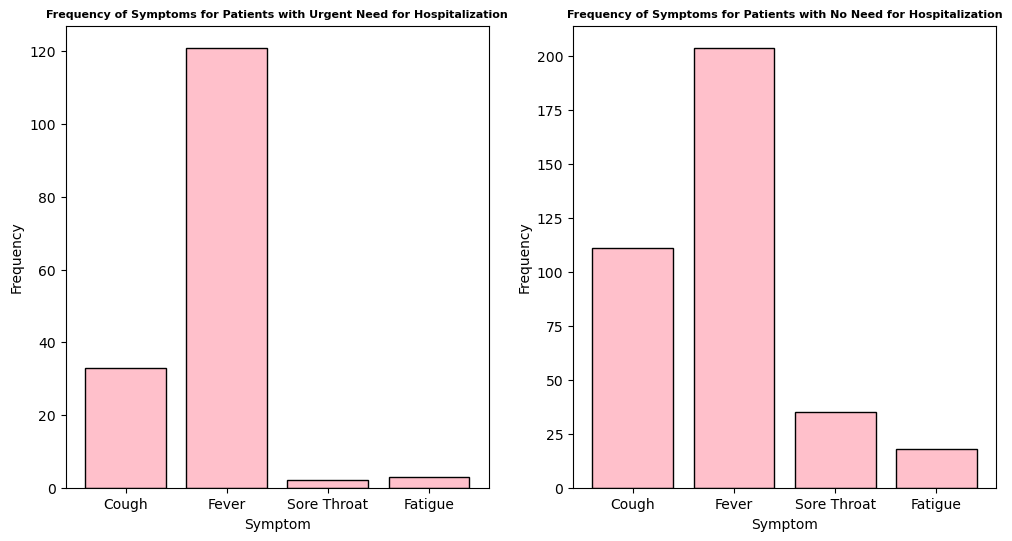

In [18]:
urgent_patients = df_symptoms[df_symptoms['Urgency'] == 1]

frequency_cough = urgent_patients['cough'].sum()
frequency_fever = urgent_patients['fever'].sum()
frequency_sorethroat = urgent_patients['sore_throat'].sum()
frequency_fatigue = urgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].bar(symptoms, frequencies, color='pink', edgecolor='black')
axs[0].set_title('Frequency of Symptoms for Patients with Urgent Need for Hospitalization', fontsize=8, weight='bold')
axs[0].set_xlabel('Symptom')
axs[0].set_ylabel('Frequency')

nonurgent_patients = df_nonsymptoms[df_nonsymptoms['Urgency'] == 0]

frequency_cough = nonurgent_patients['cough'].sum()
frequency_fever = nonurgent_patients['fever'].sum()
frequency_sorethroat = nonurgent_patients['sore_throat'].sum()
frequency_fatigue = nonurgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

axs[1].bar(symptoms, frequencies, color='pink', edgecolor='black')
axs[1].set_title('Frequency of Symptoms for Patients with No Need for Hospitalization', fontsize=8, weight='bold')
axs[1].set_xlabel('Symptom')
axs[1].set_ylabel('Frequency')
plt.show();

### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [19]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


In [20]:
df['Urgency'] = df_imputed['Urgency']

In [21]:
df = df.drop(columns=['Age_Group'])
df

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


### Train Test Split

In [22]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split
print(df.isnull().sum())
# Your code here
df = df.dropna()
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

age            0
sex            0
cough          0
fever          0
chills         0
sore_throat    0
headache       0
fatigue        0
Urgency        0
dtype: int64


In [24]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv('covid_train.csv', index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv('covid_test.csv', index=False)
